# Interactive data access and visualization
This notebook enables you to explore the AE data catalog options using a graphical user interface (GUI). You can toggle between data options and visualize the data options-- including available data options, spatial and temporal subsetting, and model types-- using a simple and interactive panel. After retrieving data, this notebook also shows you how to generate an interactive map of the data. Finally, you will learn how to easily export the data in various file formats. 

This notebook the python library [climakitae](https://github.com/cal-adapt/climakitae), our AE toolkit for climate data analysis, and the python library [climakitaegui](https://github.com/cal-adapt/climakitaegui), which facilitates the generation of interactive panels and plotting.

In [1]:
import climakitae as ck
import climakitaegui as ckg

## Step 1: Select data
We can call `Select` to display an interface from which to select the data to examine. Execute the cell, and read on for more explanation. To learn more about the data available on the Analytics Engine, [see our data catalog](https://analytics.cal-adapt.org/data/). 

Row
    [0] Card(collapsible=False, styles={'header_background': 'lig...}, title='Data Options i..., width=600)
        [0] Column
            [0] Row
                [0] Column(width=200)
                    [0] StaticText(name='Data Type')
                    [1] RadioBoxGroup(options=OrderedDict({'Gridded': 'G...]), value='Gridded')
                [1] Column(width=200)
                    [0] StaticText(name='Approach')
                    [1] RadioBoxGroup(options=OrderedDict({'Time': 'Time...]), value='Time')
                [2] Column(width=200)
                    [0] StaticText(name='Downscaling Method')
                    [1] RadioBoxGroup(name='Downscaling method', options=OrderedDict({'Dynamical': ...]), value='Dynamical')
        [1] Divider(margin=(-10, 0, 0, 0))
        [2] Row
            [0] Column(width=300)
                [0] StaticText(name='Variable Type')
                [1] RadioBoxGroup(inline=True, options=OrderedDict({'Variable': '...]), value='Variable')
                [2] Select(options=OrderedDict({'Air Temperat...]), value='Air Temperature at 2m', width=225)
                [3] StaticText(value='Temperature o...)
            [1] Column
                [0] Row
                    [0] Column(width=100)
                        [0] StaticText(name='Variable Units')
                        [1] RadioBoxGroup(name='Units', options=OrderedDict({'K': 'K', ...]), value='K')
                    [1] Column(width=100)
                        [0] StaticText(name='Timescale')
                        [1] RadioBoxGroup(options=OrderedDict({'daily': 'dai...]), value='monthly')
                    [2] Column(width=100)
                        [0] StaticText(name='Model Grid-Spacing')
                        [1] RadioBoxGroup(name='Resolution', options=OrderedDict({'3 km': '3 km...]), value='9 km')
                [1] Column(width=300)
                    [0] StaticText(styles={'color': 'red'})
        [3] Divider(margin=(-10, 0, 0, 0))
        [4] Column
            [0] StaticText(name='WARMING LEVELS APPROACH', value='Options only v...)
            [1] Row
                [0] Column(width=270)
                    [0] StaticText(name='Years around G..., value='e.g. 15 means a...)
                    [1] IntSlider(end=25, start=5, value=15, width=240)
                [1] Column(width=250)
                    [0] StaticText(name='Warming Level (°C)')
                    [1] CheckBoxGroup(inline=True, options=OrderedDict({'n/a': '...]), value=['n/a'])
        [5] Divider(margin=(-10, 0, 0, 0))
        [6] Column
            [0] StaticText(name='TIME-BASED APPROACH', value='Options only v...)
            [1] Row
                [0] Column(width=300)
                    [0] StaticText(name='Years', value='How do you want t...)
                    [1] RangeSlider(end=2100, start=1950, step=1, value=(1980, 2015), value_end=2015, value_start=1980, width=250)
                    [2] StaticText(name='Historical Data', value='<br>Estimates o...)
                    [3] CheckBoxGroup(name='Scenario historical', options=OrderedDict({'Historical C...]), value=['Historical Climate'])
                    [4] StaticText(name='Future Model Data', value='<br> Shared S...)
                    [5] CheckBoxGroup(name='Scenario ssp', options=OrderedDict({'SSP 2-4.5': ...]))
                [1] Column(width=300)
                    [0] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                    [1] StaticText(styles={'color': 'red'})
    [1] Card(collapsible=False, height=670, sizing_mode='fixed', styles={'header_background': 'lig...}, title='Location Options f..., width=635)
        [0] Row
            [0] Column(width=280)
                [0] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                [1] Select(name='Subset the data by...', options=OrderedDict({'none': 'none...]), value='none', width=225)
                [2] MultiSelect(name='Location selection', options=OrderedDict({'entire d...]), value=
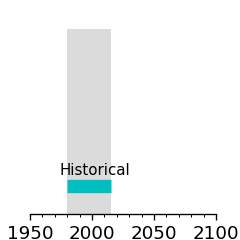
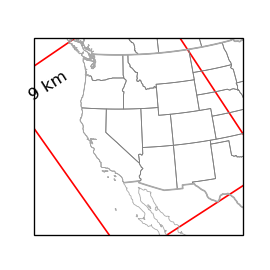

In [2]:
selections = ckg.Select()
selections.show()

Nothing is required to enter these selections, besides moving on to Step 2.

However, if you want to preview what has been selected, you can type "selections" alone in a new cell. This stores your selections behind-the-scenes.

($+$ will create a new cell, following the currently selected) 

## Step 2: Retrieve data
Call selections.retrieve(), to assign the subset/combo of data specified to a variable name of your choosing, in [xarray DataArray or Dataset](https://docs.xarray.dev/en/stable/user-guide/data-structures.html) format.

In [ ]:
data_to_use = selections.retrieve()
data_to_use

You can preview the data in the retrieved, aggregated dataset when this is complete.

Next, load the data into memory. This step may take a few minutes to compute, because the data is only loaded "lazily" until you output it (in visualize or export). This allows the previous steps to run faster.

In [ ]:
data_to_use = ck.load(data_to_use)

## Step 3: Visualize data
Preview the data before doing further calculations. 

In [ ]:
ckg.view(data_to_use)

The data previewer is also customizable: Check out an example where the display colors and coordinates are modified in gridded data. If you selected station data above, uncomment the second line in the cell below and comment out the first by using the `#` character. 

In [ ]:
ckg.view(data_to_use, lat_lon = False, cmap = 'viridis') # grided data (with x-y coordinates)
# ckg.view(data_to_use, lat_lon = False, cmap = 'green') # station, or area-averaged data selection

More plotting helper-functions will be forthcoming.

See other notebooks for example analyses, or add your own.

In [ ]:
# [insert your own code here]

You can load up another variable or resolution by modifying your selections and calling: next_data = selections.retrieve()

If you do this a lot, and things are starting to get slow, you might want to try: data_to_use.close()

## Step 4: Export data

To save data as a file, call `export` and input your desired
1) data to export – an [xarray DataArray or Dataset](https://docs.xarray.dev/en/stable/user-guide/data-structures.html), as output by e.g. selections.retrieve()
2) output file name (without file extension)
3) file format ("NetCDF", "Zarr", or "CSV")

We recommend NetCDF or Zarr, which suits data and outputs from the Analytics Engine well – they efficiently store large data containing multiple variables and dimensions. Metadata will be retained in these files.

NetCDF or Zarr can be export locally (such as onto the JupyterHUB user partition). Optionally Zarr can be exported to an AWS S3 scratch bucket for storing very large exports.

CSV can also store Analytics Engine data with any number of variables and dimensions. It works the best for smaller data with fewer dimensions. The output file will be compressed to ensure efficient storage. Metadata will be preserved in a separate file.

CSV stores data in tabular format. Rows will be indexed by the index coordinate(s) of the DataArray or Dataset (e.g. scenario, simulation, time). Columns will be formed by the data variable(s) and non-index coordinate(s).

In [ ]:
ck.export(data_to_use, filename="my_filename1", format="NetCDF") # NetCDF4 export locally

In [ ]:
ck.export(data_to_use, filename="my_filename2", format="Zarr") # Zarr export locally
#ck.remove_zarr("my_filename2") # helper function to delete Zarr directory tree

In [ ]:
ck.export(data_to_use, filename="my_filename3", format="Zarr", mode="s3") # Zarr export to S3

In [ ]:
ck.export(data_to_use, filename="my_filename4", format="CSV") # CSV export locally